In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis, PCA
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import missingno as msno
import seaborn as sns
import yfinance as yf
import dataframe_image as dfi

In [3]:
import csv

In [4]:
stock_tickers = pd.read_csv('sp500.csv')

In [5]:
stock_list = stock_tickers["Tickers"].values.tolist()

In [8]:
working_stocks = []
df = pd.DataFrame()

for stock in stock_list:
    
    try:
    
        ticker = yf.Ticker(stock)
        price_history = ticker.history(period='13y')
        target_history = price_history['2019-01-01':]

        history = price_history[:'2019-01-01']
        relative_variance = np.sqrt(history['Close'].var())/history['Close'].mean()
        attributes = pd.Series(relative_variance, index=['Variance'])

        balance_sheet = ticker.get_balance_sheet().iloc[:,0]
        attributes = attributes.append(balance_sheet)

        earnings = ticker.get_earnings().iloc[0]
        attributes = attributes.append(earnings)

        cashflow = ticker.get_cashflow().iloc[:,0]
        attributes = attributes.append(cashflow)

        year_returns = (target_history['Close'][260:].to_numpy() - target_history['Close'][:-260].to_numpy())/target_history['Close'][:-260].to_numpy()
        month_closings = (target_history['Close'][22:].to_numpy() - target_history['Close'][:-22].to_numpy())/target_history['Close'][:-22].to_numpy()
        weekly_closings = (target_history['Close'][5:].to_numpy() - target_history['Close'][:-5].to_numpy())/target_history['Close'][:-5].to_numpy()

        year_returns = np.quantile(year_returns, .05)
        month_closings = np.quantile(month_closings, .05)
        weekly_closings = np.quantile(weekly_closings, .05)

        attributes = attributes.append(pd.Series(year_returns, index=['year_returns']))
        attributes = attributes.append(pd.Series(month_closings, index=['month_closings']))
        attributes = attributes.append(pd.Series(weekly_closings, index=['weekly_closings']))

        df = df.append(attributes, ignore_index=True)
        working_stocks.append(stock)
        print(stock)
    
    except:
        print("didn't world")
        

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
AAP
AMD
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
- ANTM: No data found, symbol may be delisted
didn't world
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
- BLL: No data found, symbol may be delisted
didn't world
BAC
BBWI
BAX
BDX
- BRK.B: No data found, symbol may be delisted
didn't world
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
- BF.B: No data found for this date range, symbol may be delisted
didn't world
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
- CERN: No data found, symbol may be delisted
didn't world
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
- CTXS: No data found, symbol may be delisted
didn't world
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
- DISCA: No data found for thi

- UDR: No data found for this date range, symbol may be delisted
didn't world
- ULTA: No data found for this date range, symbol may be delisted
didn't world
- UAA: No data found for this date range, symbol may be delisted
didn't world
UA
UNP
UAL
UPS
URI
UNH
UHS
VLO
VTR
VRSN
VRSK
VZ
VRTX
VFC
- VIAC: No data found, symbol may be delisted
didn't world
VTRS
- V: No data found for this date range, symbol may be delisted
didn't world
VNO
VMC
WRB
GWW
WAB
WBA
WMT
WM
WAT
WEC
WFC
WELL
- WST: No data found for this date range, symbol may be delisted
didn't world
WDC
WU
WRK
WY
WHR
WMB
- WLTW: No data found, symbol may be delisted
didn't world
WYNN
XEL
- XLNX: No data found, symbol may be delisted
didn't world
- XYL: No data found for this date range, symbol may be delisted
didn't world
YUM
ZBRA
ZBH
ZION
ZTS


In [9]:
df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,...,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures,year_returns,month_closings,weekly_closings,Change To Operating Activities,Deferred Long Term Liab
0,0.405068,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,71000000.0,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,...,-903000000.0,-1.220000e+08,-2.000000e+07,3.690000e+08,-1.603000e+09,-0.335139,-0.141159,-0.060396,NaN,NaN
1,0.645147,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,NaN,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,...,-109500000.0,-2.550000e+07,NaN,1.190000e+07,-7.510000e+07,-0.246887,-0.128904,-0.066985,34600000.0,NaN
2,0.372391,1.273900e+10,NaN,3.917200e+10,3.580200e+10,222000000.0,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,...,-456000000.0,-3.830000e+08,NaN,6.950000e+08,-1.885000e+09,-0.165298,-0.084315,-0.053218,-312000000.0,NaN
3,0.338999,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,28000000.0,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,...,-142000000.0,-1.321000e+09,-6.740000e+08,4.036000e+09,-7.870000e+08,0.061338,-0.100183,-0.052380,-197000000.0,NaN
4,1.241132,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,NaN,2.636200e+07,1.673393e+09,4.550000e+05,NaN,...,-29323000.0,5.335000e+06,-2.334000e+06,1.509920e+08,-3.576300e+07,-0.489244,-0.194988,-0.097015,-9166000.0,15068000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.344918,3.590000e+08,NaN,1.433900e+10,-8.373000e+09,NaN,3.950000e+08,5.966000e+09,NaN,262000000.0,...,NaN,-4.600000e+07,-7.700000e+07,-3.500000e+07,-2.300000e+08,-0.192162,-0.107496,-0.051218,-33000000.0,NaN
388,0.545109,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,NaN,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,...,18000000.0,-2.390000e+08,-5.700000e+07,-2.400000e+07,-5.900000e+07,-0.499689,-0.183360,-0.084194,78000000.0,28000000.0
389,0.305673,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,5700000.0,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,...,18800000.0,-1.510000e+07,-1.734000e+08,1.175000e+08,-4.738000e+08,-0.294025,-0.117618,-0.068486,-44200000.0,NaN
390,0.382547,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,NaN,NaN,9.320000e+10,NaN,309000000.0,...,NaN,NaN,1.312300e+10,-3.280000e+08,-2.060000e+08,-0.357628,-0.146693,-0.083185,-51000000.0,NaN


In [77]:
df.to_csv("x.csv")

In [137]:
df = pd.read_csv('x.csv')

In [138]:
df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,...,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures,year_returns,month_closings,weekly_closings,Change To Operating Activities,Deferred Long Term Liab
0,0.405068,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,71000000.0,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,...,-903000000.0,-1.220000e+08,-2.000000e+07,369000000,-1.603000e+09,-0.335139,-0.141159,-0.060396,NaN,NaN
1,0.645147,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,NaN,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,...,-109500000.0,-2.550000e+07,NaN,11900000,-7.510000e+07,-0.246887,-0.128904,-0.066985,34600000.0,NaN
2,0.372391,1.273900e+10,NaN,3.917200e+10,3.580200e+10,222000000.0,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,...,-456000000.0,-3.830000e+08,NaN,695000000,-1.885000e+09,-0.165298,-0.084315,-0.053218,-312000000.0,NaN
3,0.338999,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,28000000.0,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,...,-142000000.0,-1.321000e+09,-6.740000e+08,4036000000,-7.870000e+08,0.061338,-0.100183,-0.052380,-197000000.0,NaN
4,1.241132,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,NaN,2.636200e+07,1.673393e+09,4.550000e+05,NaN,...,-29323000.0,5.335000e+06,-2.334000e+06,150992000,-3.576300e+07,-0.489244,-0.194988,-0.097015,-9166000.0,15068000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.344918,3.590000e+08,NaN,1.433900e+10,-8.373000e+09,NaN,3.950000e+08,5.966000e+09,NaN,262000000.0,...,NaN,-4.600000e+07,-7.700000e+07,-35000000,-2.300000e+08,-0.192162,-0.107496,-0.051218,-33000000.0,NaN
388,0.545109,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,NaN,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,...,18000000.0,-2.390000e+08,-5.700000e+07,-24000000,-5.900000e+07,-0.499689,-0.183360,-0.084194,78000000.0,28000000.0
389,0.305673,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,5700000.0,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,...,18800000.0,-1.510000e+07,-1.734000e+08,117500000,-4.738000e+08,-0.294025,-0.117618,-0.068486,-44200000.0,NaN
390,0.382547,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,NaN,NaN,9.320000e+10,NaN,309000000.0,...,NaN,NaN,1.312300e+10,-328000000,-2.060000e+08,-0.357628,-0.146693,-0.083185,-51000000.0,NaN


<AxesSubplot:>

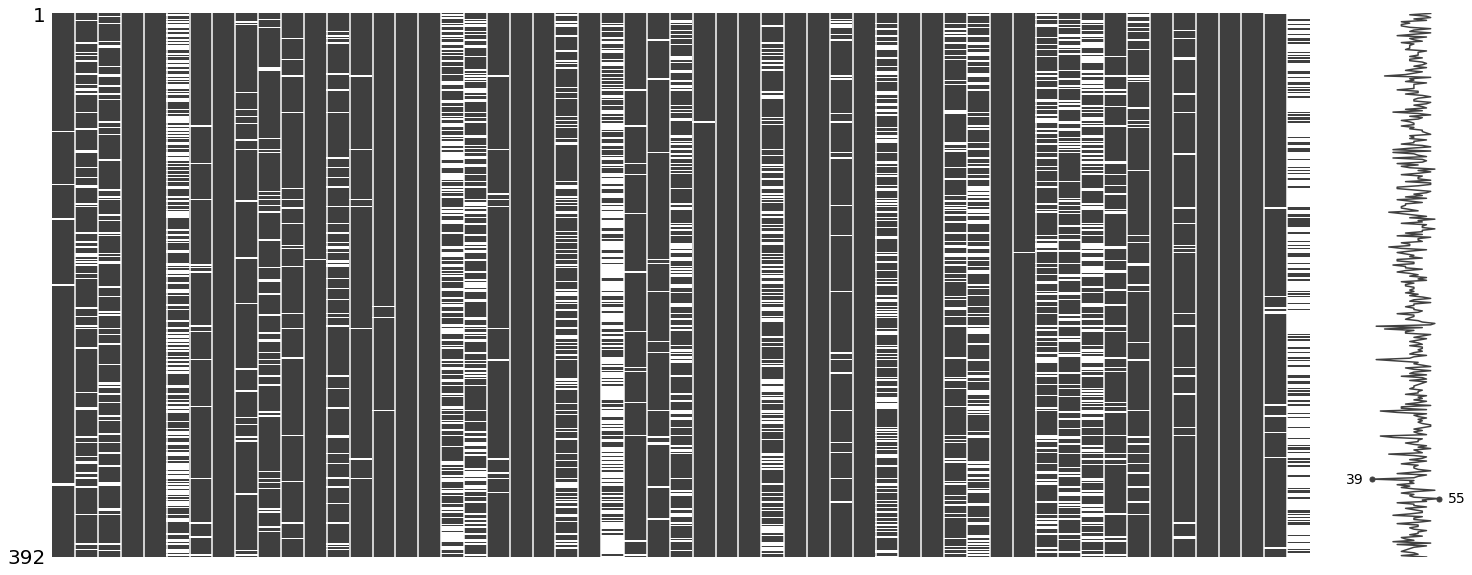

In [139]:
msno.matrix(df)

In [140]:
drop_columns = []
for column in df.columns:
    
    if df[column].isna().sum() > 100:
    
        df = df.drop(columns=[column])
        drop_columns.append(column)

In [141]:
drop_columns

['Minority Interest',
 'Deferred Long Term Asset Charges',
 'Short Long Term Debt',
 'Short Term Investments',
 'Inventory',
 'Investments',
 'Issuance Of Stock',
 'Effect Of Exchange Rate',
 'Change To Inventory',
 'Deferred Long Term Liab']

In [142]:
df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Other Cashflows From Investing Activities,Dividends Paid,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures,year_returns,month_closings,weekly_closings,Change To Operating Activities
0,0.405068,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,4.582100e+10,...,31000000.0,-3.420000e+09,-1.220000e+08,-2.000000e+07,369000000,-1.603000e+09,-0.335139,-0.141159,-0.060396,NaN
1,0.645147,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,2.826600e+09,...,NaN,-1.701000e+08,-2.550000e+07,NaN,11900000,-7.510000e+07,-0.246887,-0.128904,-0.066985,34600000.0
2,0.372391,1.273900e+10,NaN,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,3.152800e+10,...,26000000.0,-3.202000e+09,-3.830000e+08,NaN,695000000,-1.885000e+09,-0.165298,-0.084315,-0.053218,-312000000.0
3,0.338999,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,3.127000e+09,...,366000000.0,-9.261000e+09,-1.321000e+09,-6.740000e+08,4036000000,-7.870000e+08,0.061338,-0.100183,-0.052380,-197000000.0
4,1.241132,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,4.550000e+05,NaN,9.645120e+08,...,NaN,NaN,5.335000e+06,-2.334000e+06,150992000,-3.576300e+07,-0.489244,-0.194988,-0.097015,-9166000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.344918,3.590000e+08,NaN,1.433900e+10,-8.373000e+09,3.950000e+08,5.966000e+09,NaN,262000000.0,-8.048000e+09,...,-28000000.0,-5.920000e+08,-4.600000e+07,-7.700000e+07,-35000000,-2.300000e+08,-0.192162,-0.107496,-0.051218,-33000000.0
388,0.545109,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,3.573000e+09,...,NaN,NaN,-2.390000e+08,-5.700000e+07,-24000000,-5.900000e+07,-0.499689,-0.183360,-0.084194,78000000.0
389,0.305673,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,1.029220e+10,...,-21400000.0,-2.001000e+08,-1.510000e+07,-1.734000e+08,117500000,-4.738000e+08,-0.294025,-0.117618,-0.068486,-44200000.0
390,0.382547,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,NaN,9.320000e+10,NaN,309000000.0,5.175000e+09,...,31000000.0,-2.610000e+08,NaN,1.312300e+10,-328000000,-2.060000e+08,-0.357628,-0.146693,-0.083185,-51000000.0


<AxesSubplot:>

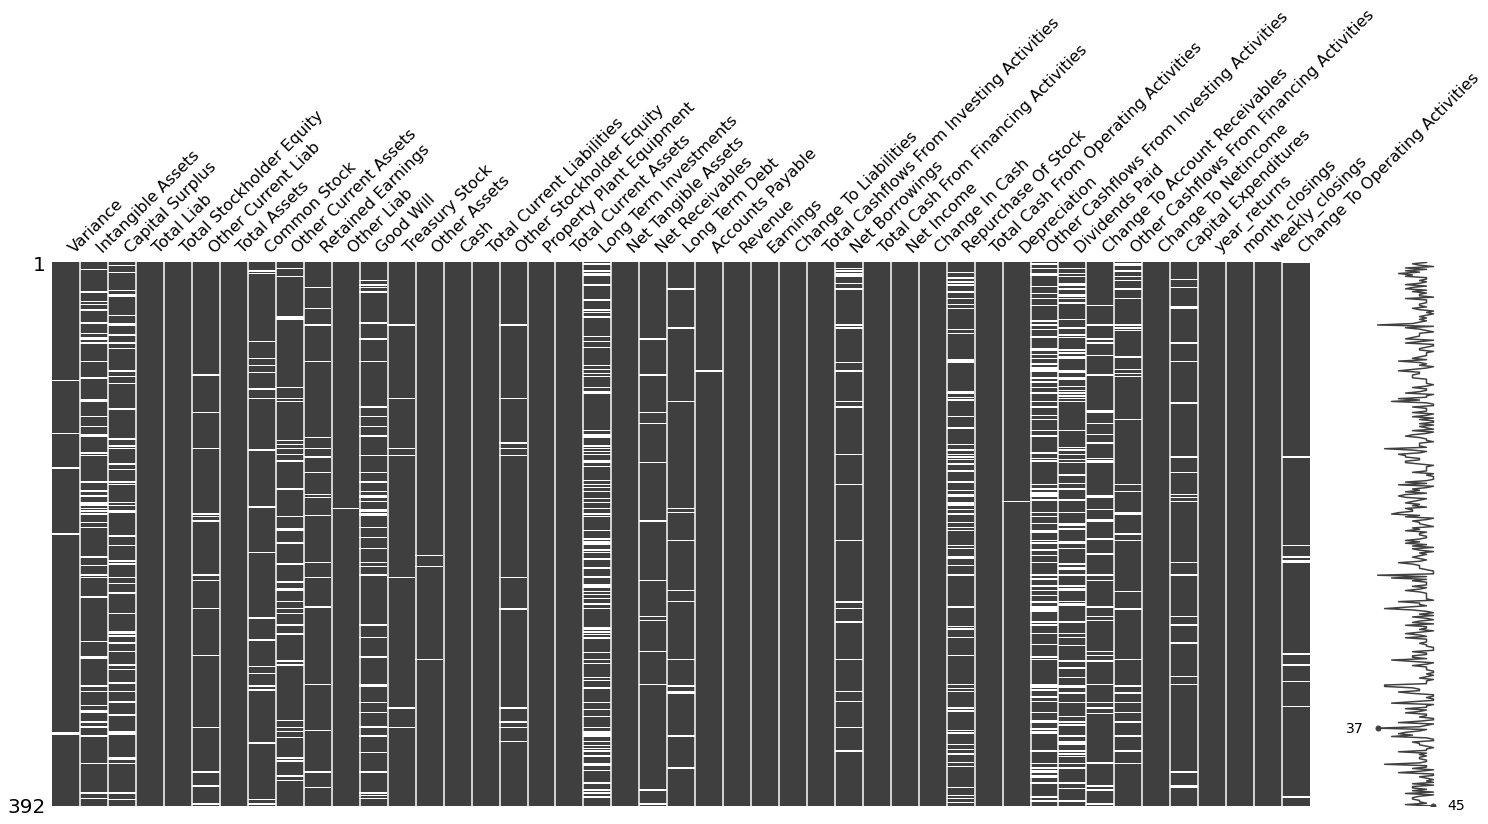

In [143]:
msno.matrix(df)

In [144]:
zeros = ['Intangible Assets','Repurchase Of Stock', 'Other Cashflows From Investing Activities','Dividends Paid','Change To Account Receivables','Other Cashflows From Financing Activities','Other Current Liab','Other Current Assets','Retained Earnings','Other Liab','Treasury Stock','Other Assets','Other Stockholder Equity','Property Plant Equipment','Accounts Payable', 'Capital Surplus']

for column in zeros:
    
    df[column] = df[column].fillna(0)
    

In [145]:
for column in df.columns:
    
    na = df[column].isna().sum()
    
    if na > 0:
    
        df[column] = df[column].fillna(df[column].median())
        

<AxesSubplot:>

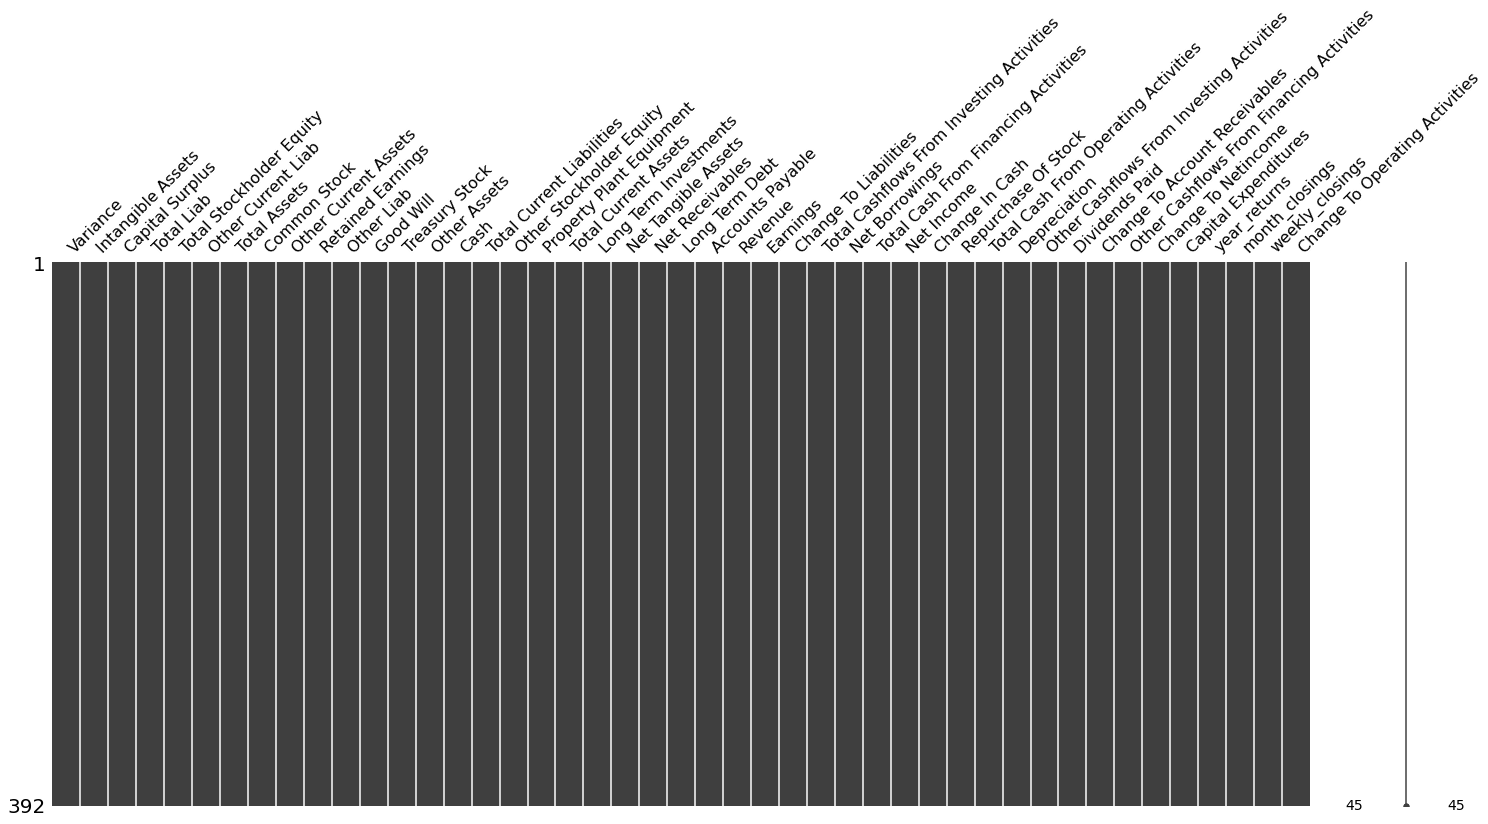

In [146]:
msno.matrix(df)

In [147]:
for column in df.columns:
    
    if column != 'Revenue':
    
        df[column + '/Revenue'] = df[column]/df['Revenue']

In [148]:
df.columns

Index(['Variance', 'Intangible Assets', 'Capital Surplus', 'Total Liab',
       'Total Stockholder Equity', 'Other Current Liab', 'Total Assets',
       'Common Stock', 'Other Current Assets', 'Retained Earnings',
       'Other Liab', 'Good Will', 'Treasury Stock', 'Other Assets', 'Cash',
       'Total Current Liabilities', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Total Current Assets',
       'Long Term Investments', 'Net Tangible Assets', 'Net Receivables',
       'Long Term Debt', 'Accounts Payable', 'Revenue', 'Earnings',
       'Change To Liabilities', 'Total Cashflows From Investing Activities',
       'Net Borrowings', 'Total Cash From Financing Activities', 'Net Income',
       'Change In Cash', 'Repurchase Of Stock',
       'Total Cash From Operating Activities', 'Depreciation',
       'Other Cashflows From Investing Activities', 'Dividends Paid',
       'Change To Account Receivables',
       'Other Cashflows From Financing Activities', 'Change To Netin

In [149]:
df = df.drop(columns= ['year_returns/Revenue','month_closings/Revenue','weekly_closings/Revenue'])

In [150]:
df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
0,0.405068,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,4.582100e+10,...,-0.067114,0.227499,0.058447,0.000946,-0.104380,-0.003723,-0.000610,0.011262,-0.048924,-0.001215
1,0.645147,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,2.826600e+09,...,-0.114966,0.201104,0.024436,0.000000,-0.053358,-0.007999,0.000000,0.003733,-0.023558,0.010854
2,0.372391,1.273900e+10,0.000000e+00,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,3.152800e+10,...,-0.075185,0.344463,0.115704,0.000850,-0.104716,-0.012525,0.000000,0.022729,-0.061646,-0.010203
3,0.338999,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,3.127000e+09,...,-0.028516,0.695417,0.260159,0.011175,-0.282753,-0.040332,-0.020578,0.123225,-0.024028,-0.006015
4,1.241132,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,4.550000e+05,0.0,9.645120e+08,...,-0.021478,0.370910,0.036506,0.000000,0.000000,0.006934,-0.003033,0.196238,-0.046480,-0.011913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.344918,3.590000e+08,0.000000e+00,1.433900e+10,-8.373000e+09,3.950000e+08,5.966000e+09,9.000000e+06,262000000.0,-8.048000e+09,...,-0.279712,0.299930,0.028833,-0.004923,-0.104079,-0.008087,-0.013537,-0.006153,-0.040436,-0.005802
388,0.545109,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,3.573000e+09,...,-0.013514,0.253438,0.044334,0.000000,0.000000,-0.056662,-0.013514,-0.005690,-0.013988,0.018492
389,0.305673,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,1.029220e+10,...,0.000000,0.188985,0.134554,-0.002698,-0.025224,-0.001903,-0.021858,0.014812,-0.059726,-0.005572
390,0.382547,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,0.000000e+00,9.320000e+10,9.000000e+06,309000000.0,5.175000e+09,...,-0.283487,0.222892,-0.004961,0.010985,-0.092488,0.000000,4.650248,-0.116230,-0.072998,-0.018072


In [27]:
maxs = []
mins = []

for column in df.columns:
    
    maxs.append(df[column].idxmax())
    mins.append(df[column].idxmin())
    
    
both = maxs + mins


max_mins = pd.DataFrame({'col1':both})

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [29]:
target_One_Year = df.pop('year_returns')
target_One_Month = df.pop('month_closings')
target_One_Week = df.pop('weekly_closings')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df, target_One_Year, test_size=0.25, random_state=42)

In [174]:
X_train

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Other Current Assets,Retained Earnings,Other Liab,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
265,0.461042,9.420000e+08,3.657000e+09,3.965700e+10,9.452000e+09,6.029000e+09,4.908600e+10,1.082000e+09,2.406600e+10,4.099000e+09,...,-0.013516,0.050799,0.028625,-0.001231,-0.004834,-0.000501,0.000041,0.010472,-0.021452,-0.005761
16,0.602848,2.044000e+09,4.940000e+08,1.015000e+10,3.801000e+09,2.128000e+09,1.395100e+10,7.100000e+07,4.242000e+09,2.704000e+09,...,0.000000,0.124637,0.047677,-0.001452,0.000000,-0.007986,0.006897,0.004840,-0.035334,-0.011012
66,0.419352,1.845300e+10,1.964000e+10,1.137550e+11,3.769300e+10,7.271000e+09,1.526480e+11,7.388000e+09,2.768800e+10,9.299400e+10,...,-0.104592,0.348218,0.029229,0.000000,-0.179391,-0.022679,0.103677,-0.142978,-0.024017,0.022186
158,0.325753,0.000000e+00,0.000000e+00,5.695600e+10,1.391100e+10,2.594000e+09,7.474500e+10,2.231000e+09,7.894000e+09,2.282700e+10,...,0.000000,0.000869,0.156198,0.027969,-0.080825,-0.040610,-0.008217,0.036660,-0.434937,-0.246188
7,0.246753,2.565000e+09,0.000000e+00,3.336900e+10,2.247700e+10,1.162800e+10,5.613600e+10,1.029800e+10,2.165500e+10,2.645000e+09,...,0.000000,0.102501,0.015480,-0.002300,-0.012962,-0.008983,0.000093,0.003668,-0.018169,0.064531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.225952,0.000000e+00,6.497730e+09,1.433203e+10,5.834020e+09,1.698590e+08,2.236526e+10,1.062770e+08,0.000000e+00,4.010090e+08,...,0.000000,0.417307,0.259449,0.003695,-0.251790,-0.035820,-0.118480,0.054341,-0.176574,-0.054073
106,0.375072,2.569000e+09,0.000000e+00,5.422900e+10,3.977300e+10,1.830900e+10,9.400200e+10,4.355000e+09,-1.319000e+09,1.944900e+10,...,-0.161471,0.254817,0.036163,-0.000289,-0.119914,-0.019440,-0.002350,0.024256,-0.009190,-0.005125
270,0.336383,1.900000e+07,6.646000e+09,1.781100e+10,1.996000e+09,1.624000e+09,2.005900e+10,3.319000e+09,-1.480000e+08,3.710000e+08,...,0.000000,0.001093,0.079904,-0.004589,0.000000,0.003132,-0.012383,-0.006118,-0.060310,-0.008813
348,0.287147,4.280000e+08,1.582700e+09,2.331700e+09,2.421900e+09,2.651000e+08,4.753600e+09,6.400000e+06,1.051400e+09,3.233000e+08,...,-0.050589,0.206806,0.026137,0.000911,-0.044855,-0.047890,-0.005565,0.005093,-0.020303,0.039392


In [73]:
pipe = Pipeline([('scaler', StandardScaler()), (('selector', VarianceThreshold())),('classifier', LinearRegression())])
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()],'selector__threshold': [0, 0.001, 0.01]}
grid = GridSearchCV(pipe, parameters, cv=10).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train,y_train)))
print('Test set score: ' + str(grid.score(X_test,y_test)))

Training set score: 0.257035986622169
Test set score: -0.08587965005979958


In [74]:
pipe = Pipeline([('scaler', StandardScaler()), (('selector', VarianceThreshold())),("regressor", RandomForestRegressor(max_depth = 5, max_features=10))])
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()],'selector__threshold': [0, 0.001, 0.01]}
grid = GridSearchCV(pipe, parameters, cv=10).fit(X_train, y_train)
print('Training set score: ' + str(grid.score(X_train,y_train)))
print('Test set score: ' + str(grid.score(X_test,y_test)))

C:\Users\hunte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hunte\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hunte\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

C:\Users\hunte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hunte\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hunte\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hunte\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)

Training set score: 0.6908149390962919
Test set score: 0.17253692311661228


C:\Users\hunte\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.23545852 0.2196871  0.23467566 0.22992296 0.21621572 0.20537838
 0.18514392 0.15207273        nan 0.22935785 0.24486072 0.27505273]
  warnings.warn(


In [165]:
pred_df = pd.DataFrame()

In [166]:
for stock in stock_list:
    
    try:

        ticker = yf.Ticker(stock)
        history = ticker.history(period='10y')

        relative_variance = np.sqrt(history['Close'].var())/history['Close'].mean()
        attributes = pd.Series(relative_variance, index=['Variance'])

        balance_sheet = ticker.get_balance_sheet().iloc[:,0]
        attributes = attributes.append(balance_sheet)

        earnings = ticker.get_earnings().iloc[0]
        attributes = attributes.append(earnings)

        cashflow = ticker.get_cashflow().iloc[:,0]
        attributes = attributes.append(cashflow)
        attributes = attributes.rename(stock)

        pred_df = pred_df.append(attributes)

        print(stock)
        
    except:
        
        print("Didn't work")

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
AAP
AMD
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
- ANTM: No data found, symbol may be delisted
Didn't work
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
- BLL: No data found, symbol may be delisted
Didn't work
BAC
BBWI
BAX
BDX
- BRK.B: No data found, symbol may be delisted
Didn't work
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
- BF.B: No data found for this date range, symbol may be delisted
Didn't work
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
- CERN: No data found, symbol may be delisted
Didn't work
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
- CTXS: No data found, symbol may be delisted
Didn't work
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
- DISCA: No data found, symbol may b

In [164]:
pred_df

,Variance,Intangible Assets,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,Change To Inventory,Deferred Long Term Asset Charges,Effect Of Exchange Rate,Inventory,Investments,Issuance Of Stock,Minority Interest,Short Long Term Debt,Short Term Investments,Deferred Long Term Liab
0,0.223346,5.288000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,9.000000e+06,2.290000e+08,4.582100e+10,6.180000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.379668,3.648000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,2.952000e+08,3.910000e+07,2.826600e+09,3.112000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.501202,1.273900e+10,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,2.447000e+10,2.920000e+08,3.152800e+10,7.815000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.484518,7.595100e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,1.800000e+07,2.260000e+08,3.127000e+09,3.098200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.680531,3.951800e+07,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,4.550000e+05,0.000000e+00,9.645120e+08,2.229100e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACN,0.551149,NaN,2.451630e+10,2.210610e+10,5.269467e+09,4.726339e+10,7.200000e+04,1.940290e+09,1.820384e+10,4.383823e+09,...,NaN,4.001200e+09,-247815000.0,NaN,-30571000.0,1.347780e+09,640991000.0,9175000.0,3.973000e+06,807940000.0
ATVI,0.502350,6.580000e+08,7.457000e+09,1.759900e+10,1.262000e+09,2.505600e+10,NaN,9.810000e+08,1.202500e+10,1.226000e+09,...,NaN,1.377000e+09,-48000000.0,NaN,32000000.0,9.000000e+07,NaN,NaN,1.800000e+08,NaN
ADM,0.367743,2.565000e+09,3.336900e+10,2.247700e+10,1.162800e+10,5.613600e+10,2.994000e+09,1.029800e+10,2.165500e+10,2.645000e+09,...,-2.839000e+09,NaN,NaN,1.448100e+10,-33000000.0,NaN,290000000.0,570000000.0,NaN,NaN
ADBE,0.751534,1.820000e+09,1.244400e+10,1.479700e+10,4.923000e+09,2.724100e+10,NaN,3.030000e+08,2.390500e+10,9.360000e+08,...,NaN,1.085000e+09,-26000000.0,NaN,-507000000.0,2.910000e+08,NaN,NaN,1.954000e+09,406000000.0


In [167]:
pred_df.to_csv('stocks_to_predict.csv')

In [154]:
pred_df = pd.read_csv('stocks_to_predict.csv')

In [155]:
pred_df.columns

Index(['Variance', 'Intangible Assets', 'Total Liab',
       'Total Stockholder Equity', 'Other Current Liab', 'Total Assets',
       'Common Stock', 'Other Current Assets', 'Retained Earnings',
       'Other Liab', 'Good Will', 'Treasury Stock', 'Other Assets', 'Cash',
       'Total Current Liabilities', 'Deferred Long Term Asset Charges',
       'Short Long Term Debt', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Total Current Assets',
       'Long Term Investments', 'Net Tangible Assets',
       'Short Term Investments', 'Net Receivables', 'Long Term Debt',
       'Inventory', 'Accounts Payable', 'Revenue', 'Earnings', 'Investments',
       'Change To Liabilities', 'Total Cashflows From Investing Activities',
       'Net Borrowings', 'Total Cash From Financing Activities',
       'Change To Operating Activities', 'Issuance Of Stock', 'Net Income',
       'Change In Cash', 'Repurchase Of Stock', 'Effect Of Exchange Rate',
       'Total Cash From Operating Activitie

In [169]:
zeros = ['Intangible Assets','Repurchase Of Stock', 'Other Cashflows From Investing Activities','Dividends Paid','Change To Account Receivables','Other Cashflows From Financing Activities','Other Current Liab','Other Current Assets','Retained Earnings','Other Liab','Treasury Stock','Other Assets','Other Stockholder Equity','Property Plant Equipment','Accounts Payable', 'Capital Surplus']

pred_df = pred_df.drop(columns=['Common Stock'])
pred_df = pred_df.drop(columns=drop_columns)

for column in zeros:
    
    pred_df[column] = pred_df[column].fillna(0)
    
for column in pred_df.columns:
    
    na = pred_df[column].isna().sum()
    
    if na > 0:
    
        pred_df[column] = pred_df[column].fillna(pred_df[column].median())
        
        
for column in pred_df.columns:
    
    if column != 'Revenue':
    
        pred_df[column + '/Revenue'] = pred_df[column]/pred_df['Revenue']

In [170]:
pred_df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
MMM,0.223346,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,4.582100e+10,...,-0.067114,0.227499,0.058447,0.000946,-0.104380,-0.003723,-0.000610,0.011262,-0.048924,-0.001193
AOS,0.379668,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,2.826600e+09,...,-0.114966,0.201104,0.024436,0.000000,-0.053358,-0.007999,0.000000,0.003733,-0.023558,0.010854
ABT,0.501202,1.273900e+10,0.000000e+00,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,3.152800e+10,...,-0.075185,0.344463,0.115704,0.000850,-0.104716,-0.012525,0.000000,0.022729,-0.061646,-0.010203
ABBV,0.484518,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,3.127000e+09,...,-0.028516,0.695417,0.260159,0.011175,-0.282753,-0.040332,-0.020578,0.123225,-0.024028,-0.006015
ABMD,0.680531,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,4.550000e+05,0.0,9.645120e+08,...,-0.021478,0.370910,0.036506,0.000000,0.000000,0.006934,-0.003033,0.196238,-0.046480,-0.011913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.370910,3.590000e+08,0.000000e+00,1.433900e+10,-8.373000e+09,3.950000e+08,5.966000e+09,9.000000e+06,262000000.0,-8.048000e+09,...,-0.279712,0.299930,0.028833,-0.004923,-0.104079,-0.008087,-0.013537,-0.006153,-0.040436,-0.005802
ZBRA,0.811150,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,3.573000e+09,...,-0.013514,0.253438,0.044334,0.000000,0.000000,-0.056662,-0.013514,-0.005690,-0.013988,0.018492
ZBH,0.200904,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,1.029220e+10,...,0.000000,0.188985,0.134554,-0.002698,-0.025224,-0.001903,-0.021858,0.014812,-0.059726,-0.005572
ZION,0.354198,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,0.000000e+00,9.320000e+10,9.000000e+06,309000000.0,5.175000e+09,...,-0.283487,0.222892,-0.004961,0.010985,-0.092488,0.000000,4.650248,-0.116230,-0.072998,-0.018072


<AxesSubplot:>

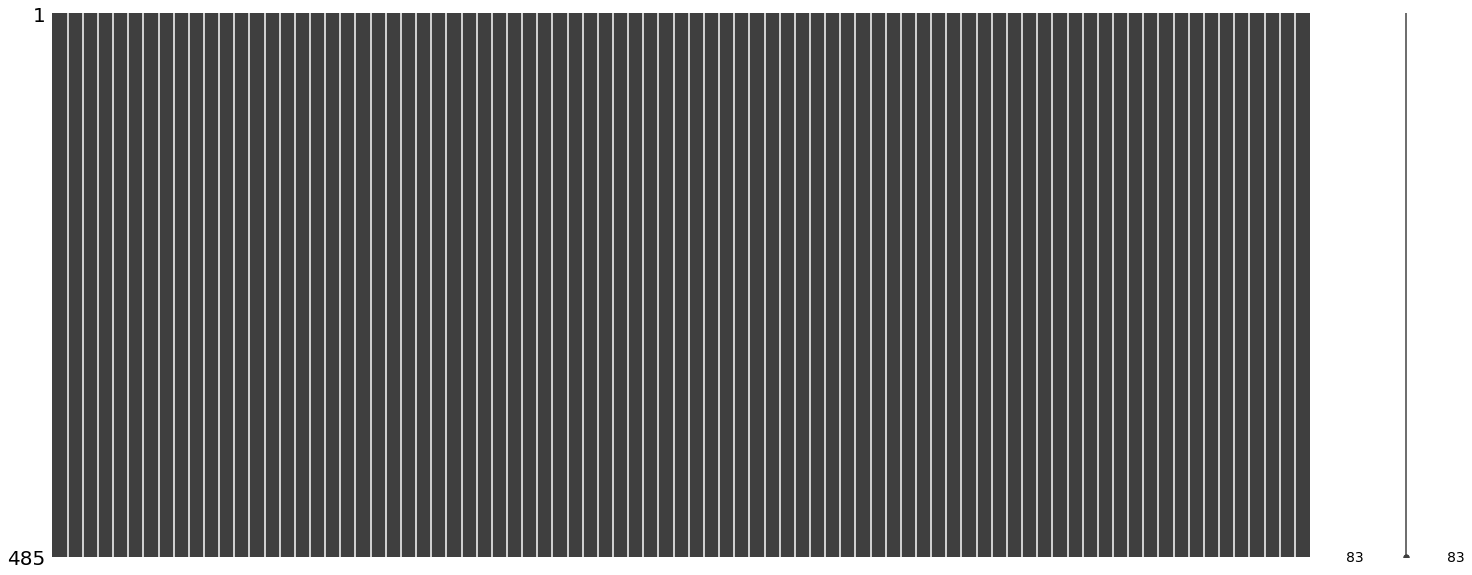

In [171]:
msno.matrix(pred_df)

In [175]:
for column in pred_df.columns:
    
    if column not in X_train.columns:
        print(column)
        

Common Stock
Common Stock/Revenue


In [173]:
pred_df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
MMM,0.223346,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,9.000000e+06,229000000.0,4.582100e+10,...,-0.067114,0.227499,0.058447,0.000946,-0.104380,-0.003723,-0.000610,0.011262,-0.048924,-0.001193
AOS,0.379668,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,2.952000e+08,39100000.0,2.826600e+09,...,-0.114966,0.201104,0.024436,0.000000,-0.053358,-0.007999,0.000000,0.003733,-0.023558,0.010854
ABT,0.501202,1.273900e+10,0.000000e+00,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,2.447000e+10,292000000.0,3.152800e+10,...,-0.075185,0.344463,0.115704,0.000850,-0.104716,-0.012525,0.000000,0.022729,-0.061646,-0.010203
ABBV,0.484518,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,1.800000e+07,226000000.0,3.127000e+09,...,-0.028516,0.695417,0.260159,0.011175,-0.282753,-0.040332,-0.020578,0.123225,-0.024028,-0.006015
ABMD,0.680531,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,4.550000e+05,0.0,9.645120e+08,...,-0.021478,0.370910,0.036506,0.000000,0.000000,0.006934,-0.003033,0.196238,-0.046480,-0.011913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.370910,3.590000e+08,0.000000e+00,1.433900e+10,-8.373000e+09,3.950000e+08,5.966000e+09,9.000000e+06,262000000.0,-8.048000e+09,...,-0.279712,0.299930,0.028833,-0.004923,-0.104079,-0.008087,-0.013537,-0.006153,-0.040436,-0.005802
ZBRA,0.811150,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,6.100000e+08,6.215000e+09,1.000000e+06,35000000.0,3.573000e+09,...,-0.013514,0.253438,0.044334,0.000000,0.000000,-0.056662,-0.013514,-0.005690,-0.013988,0.018492
ZBH,0.200904,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,4.307000e+08,2.345640e+10,3.100000e+06,43700000.0,1.029220e+10,...,0.000000,0.188985,0.134554,-0.002698,-0.025224,-0.001903,-0.021858,0.014812,-0.059726,-0.005572
ZION,0.354198,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,0.000000e+00,9.320000e+10,9.000000e+06,309000000.0,5.175000e+09,...,-0.283487,0.222892,-0.004961,0.010985,-0.092488,0.000000,4.650248,-0.116230,-0.072998,-0.018072


In [181]:
pred_df = pred_df.drop(columns = ['Common Stock'])

In [182]:
pred_df

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Other Current Assets,Retained Earnings,Other Liab,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
MMM,0.223346,5.288000e+09,6.429000e+09,3.195500e+10,1.504600e+10,2.090000e+09,4.707200e+10,229000000.0,4.582100e+10,6.180000e+09,...,-0.067114,0.227499,0.058447,0.000946,-0.104380,-0.003723,-0.000610,0.011262,-0.048924,-0.001193
AOS,0.379668,3.648000e+08,5.452000e+08,1.642200e+09,1.832200e+09,7.330000e+07,3.474400e+09,39100000.0,2.826600e+09,3.112000e+08,...,-0.114966,0.201104,0.024436,0.000000,-0.053358,-0.007999,0.000000,0.003733,-0.023558,0.010854
ABT,0.501202,1.273900e+10,0.000000e+00,3.917200e+10,3.580200e+10,1.234000e+09,7.519600e+10,292000000.0,3.152800e+10,7.815000e+09,...,-0.075185,0.344463,0.115704,0.000850,-0.104716,-0.012525,0.000000,0.022729,-0.061646,-0.010203
ABBV,0.484518,7.595100e+10,1.830500e+10,1.310930e+11,1.540800e+10,8.932000e+09,1.465290e+11,226000000.0,3.127000e+09,3.098200e+10,...,-0.028516,0.695417,0.260159,0.011175,-0.282753,-0.040332,-0.020578,0.123225,-0.024028,-0.006015
ABMD,0.680531,3.951800e+07,8.700740e+08,1.700670e+08,1.503326e+09,2.636200e+07,1.673393e+09,0.0,9.645120e+08,2.229100e+07,...,-0.021478,0.370910,0.036506,0.000000,0.000000,0.006934,-0.003033,0.196238,-0.046480,-0.011913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.370910,3.590000e+08,0.000000e+00,1.433900e+10,-8.373000e+09,3.950000e+08,5.966000e+09,262000000.0,-8.048000e+09,8.990000e+08,...,-0.279712,0.299930,0.028833,-0.004923,-0.104079,-0.008087,-0.013537,-0.006153,-0.040436,-0.005802
ZBRA,0.811150,4.690000e+08,4.620000e+08,3.231000e+09,2.984000e+09,6.100000e+08,6.215000e+09,35000000.0,3.573000e+09,3.870000e+08,...,-0.013514,0.253438,0.044334,0.000000,0.000000,-0.056662,-0.013514,-0.005690,-0.013988,0.018492
ZBH,0.200904,6.299800e+09,9.314800e+09,1.079000e+10,1.266070e+10,4.307000e+08,2.345640e+10,43700000.0,1.029220e+10,1.624400e+09,...,0.000000,0.188985,0.134554,-0.002698,-0.025224,-0.001903,-0.021858,0.014812,-0.059726,-0.005572
ZION,0.354198,1.300000e+07,1.928000e+09,8.573700e+10,7.023000e+09,0.000000e+00,9.320000e+10,309000000.0,5.175000e+09,7.260000e+08,...,-0.283487,0.222892,-0.004961,0.010985,-0.092488,0.000000,4.650248,-0.116230,-0.072998,-0.018072


In [183]:
X_train

,Variance,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Other Current Assets,Retained Earnings,Other Liab,...,Repurchase Of Stock/Revenue,Total Cash From Operating Activities/Revenue,Depreciation/Revenue,Other Cashflows From Investing Activities/Revenue,Dividends Paid/Revenue,Change To Account Receivables/Revenue,Other Cashflows From Financing Activities/Revenue,Change To Netincome/Revenue,Capital Expenditures/Revenue,Change To Operating Activities/Revenue
265,0.461042,9.420000e+08,3.657000e+09,3.965700e+10,9.452000e+09,6.029000e+09,4.908600e+10,1.082000e+09,2.406600e+10,4.099000e+09,...,-0.013516,0.050799,0.028625,-0.001231,-0.004834,-0.000501,0.000041,0.010472,-0.021452,-0.005761
16,0.602848,2.044000e+09,4.940000e+08,1.015000e+10,3.801000e+09,2.128000e+09,1.395100e+10,7.100000e+07,4.242000e+09,2.704000e+09,...,0.000000,0.124637,0.047677,-0.001452,0.000000,-0.007986,0.006897,0.004840,-0.035334,-0.011012
66,0.419352,1.845300e+10,1.964000e+10,1.137550e+11,3.769300e+10,7.271000e+09,1.526480e+11,7.388000e+09,2.768800e+10,9.299400e+10,...,-0.104592,0.348218,0.029229,0.000000,-0.179391,-0.022679,0.103677,-0.142978,-0.024017,0.022186
158,0.325753,0.000000e+00,0.000000e+00,5.695600e+10,1.391100e+10,2.594000e+09,7.474500e+10,2.231000e+09,7.894000e+09,2.282700e+10,...,0.000000,0.000869,0.156198,0.027969,-0.080825,-0.040610,-0.008217,0.036660,-0.434937,-0.246188
7,0.246753,2.565000e+09,0.000000e+00,3.336900e+10,2.247700e+10,1.162800e+10,5.613600e+10,1.029800e+10,2.165500e+10,2.645000e+09,...,0.000000,0.102501,0.015480,-0.002300,-0.012962,-0.008983,0.000093,0.003668,-0.018169,0.064531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.225952,0.000000e+00,6.497730e+09,1.433203e+10,5.834020e+09,1.698590e+08,2.236526e+10,1.062770e+08,0.000000e+00,4.010090e+08,...,0.000000,0.417307,0.259449,0.003695,-0.251790,-0.035820,-0.118480,0.054341,-0.176574,-0.054073
106,0.375072,2.569000e+09,0.000000e+00,5.422900e+10,3.977300e+10,1.830900e+10,9.400200e+10,4.355000e+09,-1.319000e+09,1.944900e+10,...,-0.161471,0.254817,0.036163,-0.000289,-0.119914,-0.019440,-0.002350,0.024256,-0.009190,-0.005125
270,0.336383,1.900000e+07,6.646000e+09,1.781100e+10,1.996000e+09,1.624000e+09,2.005900e+10,3.319000e+09,-1.480000e+08,3.710000e+08,...,0.000000,0.001093,0.079904,-0.004589,0.000000,0.003132,-0.012383,-0.006118,-0.060310,-0.008813
348,0.287147,4.280000e+08,1.582700e+09,2.331700e+09,2.421900e+09,2.651000e+08,4.753600e+09,6.400000e+06,1.051400e+09,3.233000e+08,...,-0.050589,0.206806,0.026137,0.000911,-0.044855,-0.047890,-0.005565,0.005093,-0.020303,0.039392


In [199]:
predictions = grid.predict(pred_df)
    
    
    

In [200]:
predictions

array([-0.2260333 , -0.24622678, -0.17241706, -0.28975289, -0.41496299,
       -0.22812012, -0.2632076 , -0.19579674, -0.38033098, -0.23901239,
       -0.3664775 , -0.28350998, -0.24020194, -0.22332959, -0.20256089,
       -0.36050842, -0.40398586, -0.32429816, -0.29991877, -0.43458538,
       -0.27334281, -0.18684192, -0.23424347, -0.30587504, -0.30587504,
       -0.25246943, -0.33903411, -0.19093333, -0.17445763, -0.57499824,
       -0.20289678, -0.33013587, -0.35901244, -0.19572207, -0.19941401,
       -0.23034862, -0.08948536, -0.19318786, -0.1904414 , -0.19834706,
       -0.23625536, -0.39941712, -0.1902408 , -0.53121255, -0.18240684,
       -0.2402001 , -0.30093313, -0.31232772, -0.16003137, -0.21265721,
       -0.20956976, -0.19792801, -0.397655  , -0.17306664, -0.21061471,
       -0.28428503, -0.19473632, -0.35449579, -0.2341458 , -0.39214659,
       -0.19636657, -0.19624261, -0.20623115, -0.34919564, -0.36055717,
       -0.31139828, -0.25028732, -0.26739181, -0.57010088, -0.32

In [202]:
pred_df.index

Index(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'AAP',
       ...
       'WHR', 'WMB', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=485)

In [203]:
predictions = dict(zip(pred_df.index,predictions))

In [204]:
predictions

{'MMM': -0.2260332962009575,
 'AOS': -0.24622678019112776,
 'ABT': -0.1724170559568427,
 'ABBV': -0.2897528942055996,
 'ABMD': -0.4149629942185844,
 'ACN': -0.228120121699909,
 'ATVI': -0.26320760351527783,
 'ADM': -0.19579674422786691,
 'ADBE': -0.38033097651242564,
 'AAP': -0.23901239233764027,
 'AMD': -0.36647749685349207,
 'AES': -0.28350998488351736,
 'AFL': -0.24020193917972193,
 'A': -0.2233295903828784,
 'APD': -0.20256088925797386,
 'AKAM': -0.36050842469580724,
 'ALK': -0.40398586205288844,
 'ALB': -0.32429815677874385,
 'ARE': -0.29991877373231834,
 'ALGN': -0.43458538231304367,
 'ALLE': -0.27334280829980573,
 'LNT': -0.18684192318224324,
 'ALL': -0.2342434740647766,
 'GOOGL': -0.3058750366505383,
 'GOOG': -0.3058750366505383,
 'MO': -0.25246942997786265,
 'AMZN': -0.3390341055389658,
 'AMCR': -0.19093332825477508,
 'AEE': -0.17445763327828107,
 'AAL': -0.5749982392663228,
 'AEP': -0.20289678240635373,
 'AXP': -0.33013586961856256,
 'AIG': -0.3590124390107086,
 'AMT': -0.195